In [3]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

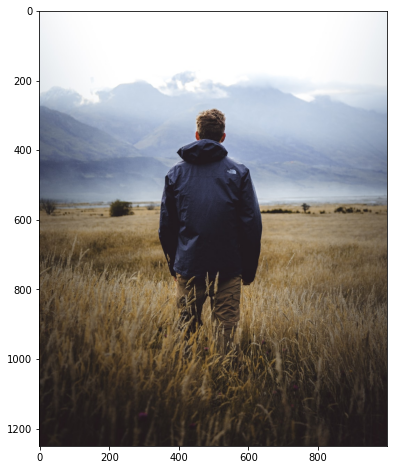

In [5]:
img = Image.open('man.jpg')
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

# transforming horizontally

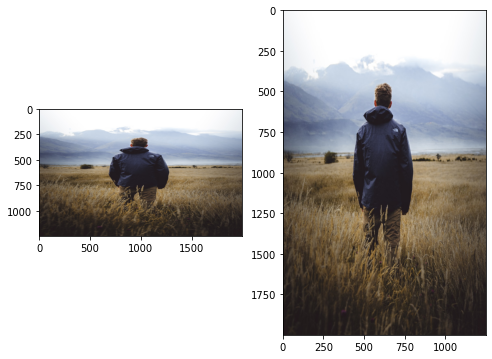

In [8]:
width= img.size[0]
height = img.size[1]

n_width= width * 2
n_height = height *2

# streching the photo horizontally by assigning the width twice of the initially
new_img1= img.resize((n_width, height))

# streching the photo vertically by assigning the length twice of the initially
new_img2= img.resize((height, n_width))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(new_img1)
plt.subplot(1,2,2)
plt.imshow(new_img2)
plt.show()


# adding constant to the image values

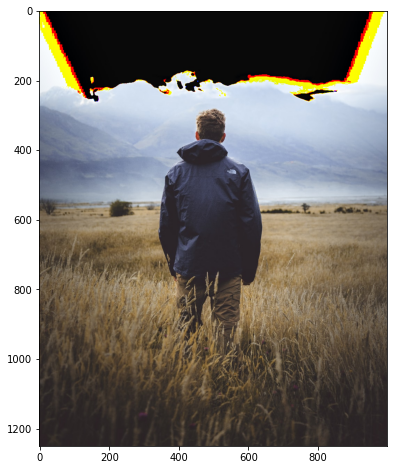

In [28]:
img = np.array(img)
new_img = img + 10
plt.figure(figsize=(8,8))
plt.imshow(new_img)
plt.show()

# multiplying the image with the constant
it creates a lot of noises in the image

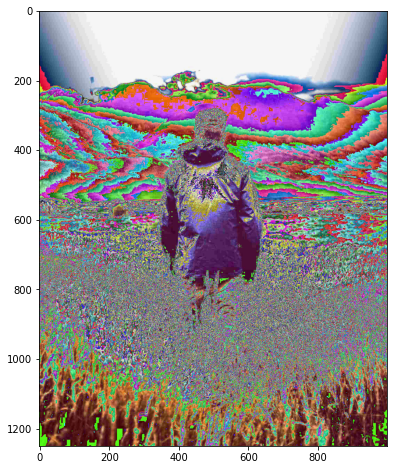

In [29]:
img = np.array(img)
new_img = img * 10
plt.figure(figsize=(8,8))
plt.imshow(new_img)
plt.show()

In [30]:
Noise = np.random.normal(0, 20, (height, width, 3)).astype(np.uint8)
Noise.shape

(1250, 1000, 3)

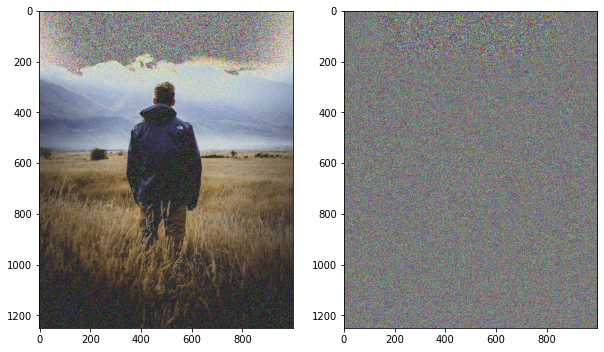

In [38]:
new_image1= img + Noise
new_image2 = img * Noise

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(new_image1)
plt.subplot(1,2,2)
plt.imshow(new_image2)
plt.show()

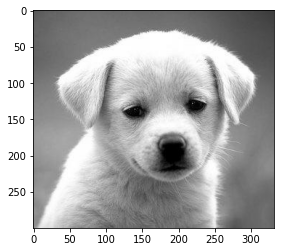

In [61]:
dog= Image.open("dog.jpg")
plt.imshow(dog)
plt.show()

In [42]:
from PIL import ImageOps

In [62]:
#converting the image into one channel 
dog_gray = ImageOps.grayscale(dog)

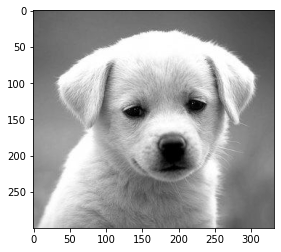

In [45]:
dog_gray= np.array(dog_gray)
plt.imshow(dog_gray, cmap = 'gray')
plt.show()

applying the algorithm design for the matrices. using singular value decomposition,
decomposing our image matrix into a product of three matrices.

In [47]:
U , s , V = np.linalg.svd(dog_gray, full_matrices=True) 

In [49]:
s.shape

(300,)

In [64]:
dog_gray= np.array(dog_gray)
S = np.zeros((dog_gray.shape[0], dog_gray.shape[1]))
S[: dog_gray.shape[0], :dog_gray.shape[0]]= np.diag(s)

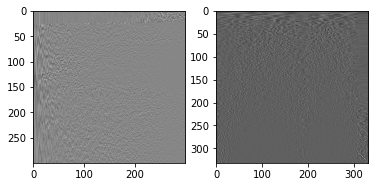

In [65]:
# plot_image(U, V, title_1="Matrix U", title_2="Matrix V")
plt.subplot(1,2,1)
plt.imshow(U, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(V, cmap='gray')
plt.show()

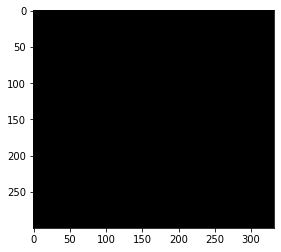

In [66]:
plt.imshow(S, cmap='gray')
plt.show()

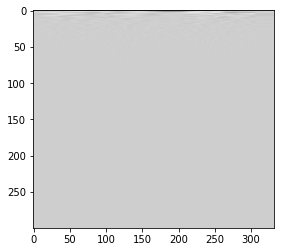

In [67]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

In [68]:
A = U.dot(B)

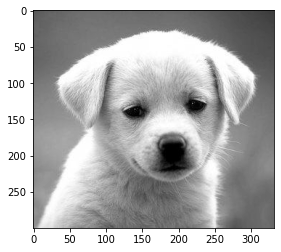

In [69]:
plt.imshow(A,cmap='gray')
plt.show()

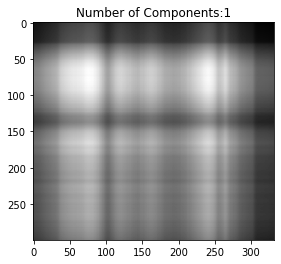

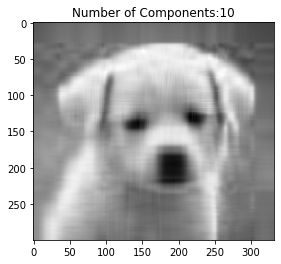

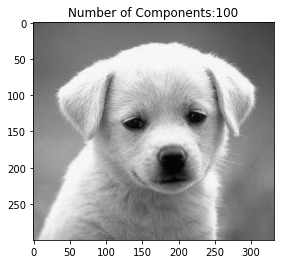

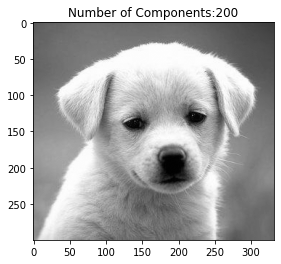

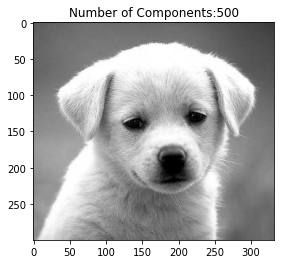

In [70]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()